# Plotting Current and Gain Distributions with Matplotlib

In [77]:
import csv
import time
import string
import requests
import json
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import scrapy
from scrapy.crawler import CrawlerProcess

# Power Data Cleaning

In [78]:
power = pd.read_csv('docs/B18U01_804A_Power_NC_power.csv')
power.head()

,Unnamed: 0,Test,Die,VDD (V),Unnamed: 4,Unnamed: 5,Unnamed: 6,Id (mA),Unnamed: 8,Freq (GHz),...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,693862,POW1,AD10,5,#,#,#,58.76,#,0.5,...,#,#,#,#,#,#,#,#,#,#
1,693862,POW1,AD10,5,#,#,#,58.23,#,2.0,...,#,#,#,#,#,#,#,#,#,#
2,693862,POW1,AD10,5,#,#,#,58.30,#,6.0,...,#,#,#,#,#,#,#,#,#,#
3,693862,POW1,AD10,5,#,#,#,58.42,#,8.0,...,#,#,#,#,#,#,#,#,#,#
4,693862,POW1,AD10,5,#,#,#,58.84,#,12.0,...,#,#,#,#,#,#,#,#,#,#


In [79]:
# Drop unnecessary columns
power = power.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 8', 
                            'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 16', 'Unnamed: 17', 
                            'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 
                            'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 
                            'Unnamed: 26'])
power.head()

,Unnamed: 0,Test,Die,VDD (V),Id (mA),Freq (GHz),Pin (dBm),Pin (dBm).1,Pout (dBm),Gain (dB)
0,693862,POW1,AD10,5,58.76,0.5,-9,-9.035750,7.550,16.550
1,693862,POW1,AD10,5,58.23,2.0,-9,-8.983687,7.952,16.952
2,693862,POW1,AD10,5,58.30,6.0,-9,-9.026563,7.698,16.698
3,693862,POW1,AD10,5,58.42,8.0,-9,-8.969000,8.024,17.024
4,693862,POW1,AD10,5,58.84,12.0,-9,-8.952312,9.724,18.724


In [80]:
# Rename columns
power.columns = ['ID', 'Test', 'Die', 'Vdd', 'Id', 'Freq', 'Pin', 'Pin_measured', 'Pout', 'Gain']
power.head()

,ID,Test,Die,Vdd,Id,Freq,Pin,Pin_measured,Pout,Gain
0,693862,POW1,AD10,5,58.76,0.5,-9,-9.035750,7.550,16.550
1,693862,POW1,AD10,5,58.23,2.0,-9,-8.983687,7.952,16.952
2,693862,POW1,AD10,5,58.30,6.0,-9,-9.026563,7.698,16.698
3,693862,POW1,AD10,5,58.42,8.0,-9,-8.969000,8.024,17.024
4,693862,POW1,AD10,5,58.84,12.0,-9,-8.952312,9.724,18.724


In [81]:
# Check datatypes
print(power.dtypes)

ID                int64
Test             object
Die              object
Vdd               int64
Id              float64
Freq            float64
Pin               int64
Pin_measured    float64
Pout            float64
Gain            float64
dtype: object


In [82]:
# Extract only the data for Pin=-9
power = power.loc[power['Pin'] == -9]
power.head()

,ID,Test,Die,Vdd,Id,Freq,Pin,Pin_measured,Pout,Gain
0,693862,POW1,AD10,5,58.76,0.5,-9,-9.035750,7.550,16.550
1,693862,POW1,AD10,5,58.23,2.0,-9,-8.983687,7.952,16.952
2,693862,POW1,AD10,5,58.30,6.0,-9,-9.026563,7.698,16.698
3,693862,POW1,AD10,5,58.42,8.0,-9,-8.969000,8.024,17.024
4,693862,POW1,AD10,5,58.84,12.0,-9,-8.952312,9.724,18.724


# Gain Distribution (Pin=-9dBm, Freq=0.5GHz)

In [83]:
# Extract all rows for Freq=0.5
power_500MHz = power.loc[power['Freq'] == 0.5].drop(['ID', 'Test', 'Die', 'Vdd', 'Pin_measured'], axis=1)
power_500MHz.head()

,Id,Freq,Pin,Pout,Gain
0,58.76,0.5,-9,7.550,16.550
80,58.51,0.5,-9,7.654,16.654
160,58.64,0.5,-9,7.606,16.606
240,58.38,0.5,-9,7.280,16.280
281,59.05,0.5,-9,7.632,16.632


In [84]:
# Export data to csv
power_500MHz.to_csv('docs/B18U01_804A_Power_NC_power_500MHz.csv')

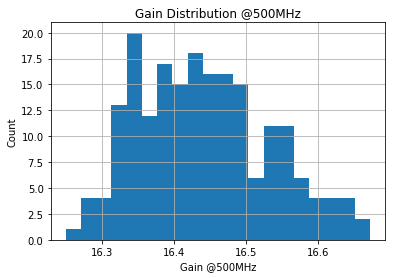

In [85]:
# Plot gain distribution at 0.5GHz
power_500MHz.Gain.hist(bins=20)
plt.title('Gain Distribution @500MHz')
plt.xlabel('Gain @500MHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (Pin=-9dBm, Freq=0.5GHz)

In [86]:
power_500MHz.describe()

,Id,Freq,Pin,Pout,Gain
count,199.000000,199.0,199.0,199.000000,199.000000
mean,58.790352,0.5,-9.0,7.442050,16.442050
std,0.287915,0.0,0.0,0.091517,0.091517
min,58.160000,0.5,-9.0,7.249000,16.249000
25%,58.610000,0.5,-9.0,7.370500,16.370500
50%,58.780000,0.5,-9.0,7.436000,16.436000
75%,58.990000,0.5,-9.0,7.502500,16.502500
max,59.420000,0.5,-9.0,7.673000,16.673000


# Gain Distribution (Pin=-9dBm, Freq=2GHz)

In [87]:
# Extract all rows for Freq=2
power_2GHz = power.loc[power['Freq'] == 2].drop(['ID', 'Test', 'Die', 'Vdd', 'Pin_measured'], axis=1)
power_2GHz.head()

,Id,Freq,Pin,Pout,Gain
1,58.23,2.0,-9,7.952,16.952
81,57.89,2.0,-9,8.044,17.044
161,58.09,2.0,-9,7.994,16.994
241,57.74,2.0,-9,7.836,16.836
282,58.45,2.0,-9,7.999,16.999


In [88]:
# Export data to csv
power_2GHz.to_csv('docs/B18U01_804A_Power_NC_power_2GHz.csv')

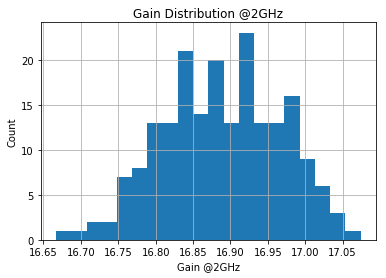

In [89]:
# Plot gain distribution at 2GHz
power_2GHz.Gain.hist(bins=20)
plt.title('Gain Distribution @2GHz')
plt.xlabel('Gain @2GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (Pin=-9dBm, Freq=2GHz)

In [90]:
power_2GHz.describe()

,Id,Freq,Pin,Pout,Gain
count,199.000000,199.0,199.0,199.000000,199.000000
mean,58.081508,2.0,-9.0,7.889543,16.889543
std,0.311156,0.0,0.0,0.079377,0.079377
min,57.450000,2.0,-9.0,7.667000,16.667000
25%,57.850000,2.0,-9.0,7.831000,16.831000
50%,58.070000,2.0,-9.0,7.888000,16.888000
75%,58.285000,2.0,-9.0,7.949500,16.949500
max,58.870000,2.0,-9.0,8.074000,17.074000


# Gain Distribution (Pin=-9dBm, Freq=6GHz)

In [91]:
# Extract all rows for Freq=6
power_6GHz = power.loc[power['Freq'] == 6].drop(['ID', 'Test', 'Die', 'Vdd', 'Pin_measured'], axis=1)
power_6GHz.head()

,Id,Freq,Pin,Pout,Gain
2,58.30,6.0,-9,7.698,16.698
82,57.97,6.0,-9,7.756,16.756
162,58.17,6.0,-9,7.732,16.732
242,57.90,6.0,-9,6.752,15.752
283,58.59,6.0,-9,7.728,16.728


In [92]:
# Export data to csv
power_6GHz.to_csv('docs/B18U01_804A_Power_NC_power_6GHz.csv')

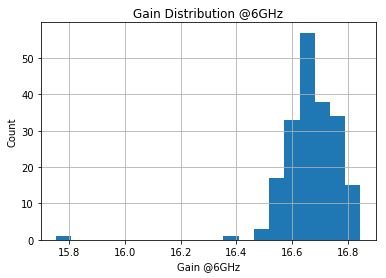

In [93]:
# Plot gain distribution at 6GHz
power_6GHz.Gain.hist(bins=20)
plt.title('Gain Distribution @6GHz')
plt.xlabel('Gain @6GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (Pin=-9dBm, Freq=6GHz)

In [94]:
power_6GHz.describe()

,Id,Freq,Pin,Pout,Gain
count,199.000000,199.0,199.0,199.000000,199.000000
mean,58.196935,6.0,-9.0,7.668819,16.668819
std,0.303582,0.0,0.0,0.103030,0.103030
min,57.550000,6.0,-9.0,6.752000,15.752000
25%,57.970000,6.0,-9.0,7.618000,16.618000
50%,58.190000,6.0,-9.0,7.667000,16.667000
75%,58.395000,6.0,-9.0,7.734500,16.734500
max,58.980000,6.0,-9.0,7.845000,16.845000


# Gain Distribution (Pin=-9dBm, Freq=8GHz)

In [95]:
# Extract all rows for Freq=8
power_8GHz = power.loc[power['Freq'] == 8].drop(['ID', 'Test', 'Die', 'Vdd', 'Pin_measured'], axis=1)
power_8GHz.head()

,Id,Freq,Pin,Pout,Gain
3,58.42,8.0,-9,8.024,17.024
83,58.23,8.0,-9,8.183,17.183
163,58.33,8.0,-9,8.048,17.048
284,58.77,8.0,-9,8.075,17.075
364,57.95,8.0,-9,8.056,17.056


In [96]:
# Export data to csv
power_8GHz.to_csv('docs/B18U01_804A_Power_NC_power_8GHz.csv')

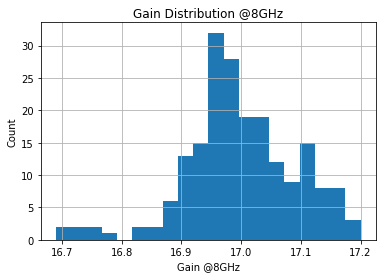

In [97]:
# Plot gain distribution at 8GHz
power_8GHz.Gain.hist(bins=20)
plt.title('Gain Distribution @8GHz')
plt.xlabel('Gain @8GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (Pin=-9dBm, Freq=8GHz)

In [98]:
power_8GHz.describe()

,Id,Freq,Pin,Pout,Gain
count,198.000000,198.0,198.0,198.000000,198.000000
mean,58.442980,8.0,-9.0,7.998076,16.998076
std,0.293867,0.0,0.0,0.093862,0.093862
min,57.770000,8.0,-9.0,7.690000,16.690000
25%,58.262500,8.0,-9.0,7.952500,16.952500
50%,58.430000,8.0,-9.0,7.988000,16.988000
75%,58.640000,8.0,-9.0,8.056000,17.056000
max,59.110000,8.0,-9.0,8.200000,17.200000


# Gain Distribution (Pin=-9dBm, Freq=12GHz)

In [99]:
# Extract all rows for Freq=12
power_12GHz = power.loc[power['Freq'] == 12].drop(['ID', 'Test', 'Die', 'Vdd', 'Pin_measured'], axis=1)
power_12GHz.head()

,Id,Freq,Pin,Pout,Gain
4,58.84,12.0,-9,9.724,18.724
84,58.58,12.0,-9,9.591,18.591
164,58.72,12.0,-9,9.601,18.601
285,59.16,12.0,-9,9.757,18.757
365,58.37,12.0,-9,9.717,18.717


In [100]:
# Export data to csv
power_12GHz.to_csv('docs/B18U01_804A_Power_NC_power_12GHz.csv')

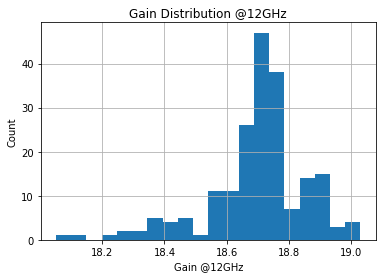

In [101]:
# Plot gain distribution at 12GHz
power_12GHz.Gain.hist(bins=20)
plt.title('Gain Distribution @12GHz')
plt.xlabel('Gain @12GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (Pin=-9dBm, Freq=12GHz)

In [102]:
power_12GHz.describe()

,Id,Freq,Pin,Pout,Gain
count,198.000000,198.0,198.0,198.000000,198.000000
mean,58.881515,12.0,-9.0,9.699510,18.699510
std,0.298056,0.0,0.0,0.158162,0.158162
min,58.170000,12.0,-9.0,9.052000,18.052000
25%,58.692500,12.0,-9.0,9.648250,18.648250
50%,58.880000,12.0,-9.0,9.716500,18.716500
75%,59.080000,12.0,-9.0,9.775750,18.775750
max,59.610000,12.0,-9.0,10.029000,19.029000


# Vg1 Distribution (DC)

In [103]:
dc = pd.read_csv('docs/B18U01_804A_Power_NC_DC.csv')
dc.head()

,Unnamed: 0,Test,Die,VDD (V),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,693862.0,TCC2,AD10,5.0,#,#,#,#,#,#,...,#,#,#,#,#,#,#,#,#,#
1,693862.0,TCC2,AD15,5.0,#,#,#,#,#,#,...,#,#,#,#,#,#,#,#,#,#
2,693862.0,TCC2,AD16,5.0,#,#,#,#,#,#,...,#,#,#,#,#,#,#,#,#,#
3,693862.0,TCC2,AD17,5.0,#,#,#,#,#,#,...,#,#,#,#,#,#,#,#,#,#
4,693862.0,TCC2,AD18,5.0,#,#,#,#,#,#,...,#,#,#,#,#,#,#,#,#,#


In [104]:
# Drop unnecessary columns
dc = dc.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 12', 
                      'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',  'Unnamed: 18', 
                      'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 
                      'Unnamed: 25', 'Unnamed: 26']).dropna()

dc.columns = ['ID', 'Test', 'Die', 'Vdd', 'Vg1', 'Idd']
dc.head()

,ID,Test,Die,Vdd,Vg1,Idd
0,693862.0,TCC2,AD10,5.0,-0.426875,0.05789
1,693862.0,TCC2,AD15,5.0,-0.399375,0.05774
2,693862.0,TCC2,AD16,5.0,-0.402813,0.05783
3,693862.0,TCC2,AD17,5.0,-0.399375,0.05754
4,693862.0,TCC2,AD18,5.0,-0.402813,0.05822


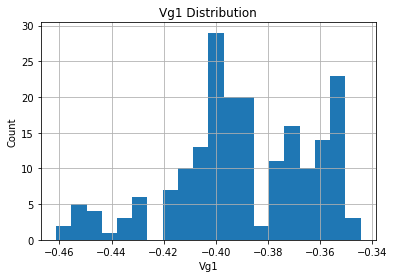

In [105]:
# Plot Vg1 distribution
dc.Vg1.hist(bins=20)
plt.title('Vg1 Distribution')
plt.xlabel('Vg1')
plt.ylabel('Count')
plt.show()

# Key Statistics (DC)

In [106]:
dc.describe()

,ID,Vdd,Vg1,Idd
count,199.0,199.0,199.000000,199.000000
mean,693862.0,5.0,-0.389460,0.058003
std,0.0,0.0,0.026801,0.000294
min,693862.0,5.0,-0.461250,0.057430
25%,693862.0,5.0,-0.406250,0.057820
50%,693862.0,5.0,-0.392500,0.058010
75%,693862.0,5.0,-0.366719,0.058210
max,693862.0,5.0,-0.344375,0.058560


# Compression Data Cleaning

In [107]:
compression = pd.read_csv('docs/B18U01_804A_Power_NC_compression.csv')
compression.head()

,Unnamed: 0,Test,Die,VDD (V),Unnamed: 4,Freq (GHz),Comp. level (dB),Pin_comp(dBm),Pout_comp (dBm),Linear Gain,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,693862,PDB2,AD10,5,#,0.5,1,1.33,16.88,16.55,...,#,#,#,#,#,#,PASS,#,#,#
1,693862,PDB2,AD10,5,#,2.0,1,0.11,16.06,16.95,...,#,#,#,#,#,#,PASS,#,#,#
2,693862,PDB2,AD10,5,#,6.0,1,0.10,15.79,16.69,...,#,#,#,#,#,#,PASS,#,#,#
3,693862,PDB2,AD10,5,#,8.0,1,-0.35,15.67,17.02,...,#,#,#,#,#,#,PASS,#,#,#
4,693862,PDB2,AD10,5,#,12.0,1,-4.62,13.09,18.72,...,#,#,#,#,#,#,PASS,#,#,#


In [108]:
# Drop unnecessary columns
compression = compression.drop(columns=['Unnamed: 4','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 
                                        'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 
                                        'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 
                                        'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 
                                        'Unnamed: 26'])
compression.head()

,Unnamed: 0,Test,Die,VDD (V),Freq (GHz),Comp. level (dB),Pin_comp(dBm),Pout_comp (dBm),Linear Gain,Id (mA)
0,693862,PDB2,AD10,5,0.5,1,1.33,16.88,16.55,66.390
1,693862,PDB2,AD10,5,2.0,1,0.11,16.06,16.95,64.855
2,693862,PDB2,AD10,5,6.0,1,0.10,15.79,16.69,64.274
3,693862,PDB2,AD10,5,8.0,1,-0.35,15.67,17.02,62.335
4,693862,PDB2,AD10,5,12.0,1,-4.62,13.09,18.72,60.268


In [109]:
print(compression.dtypes)

Unnamed: 0            int64
Test                 object
Die                  object
VDD (V)               int64
Freq (GHz)          float64
Comp. level (dB)      int64
Pin_comp(dBm)       float64
Pout_comp (dBm)     float64
Linear Gain         float64
Id (mA)             float64
dtype: object


In [110]:
# Rename columns
compression.columns = ['ID', 'Test', 'Die', 'Vdd', 'Freq', 'Compression Level', 'Pin_comp', 'Pout_comp', 'Linear Gain', 'Id']
compression.head()

,ID,Test,Die,Vdd,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
0,693862,PDB2,AD10,5,0.5,1,1.33,16.88,16.55,66.390
1,693862,PDB2,AD10,5,2.0,1,0.11,16.06,16.95,64.855
2,693862,PDB2,AD10,5,6.0,1,0.10,15.79,16.69,64.274
3,693862,PDB2,AD10,5,8.0,1,-0.35,15.67,17.02,62.335
4,693862,PDB2,AD10,5,12.0,1,-4.62,13.09,18.72,60.268


In [111]:
# Extract P-1dB data
compression_level_1dB = compression.loc[compression['Compression Level'] == 1].dropna()
compression_level_1dB.head()

,ID,Test,Die,Vdd,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
0,693862,PDB2,AD10,5,0.5,1,1.33,16.88,16.55,66.390
1,693862,PDB2,AD10,5,2.0,1,0.11,16.06,16.95,64.855
2,693862,PDB2,AD10,5,6.0,1,0.10,15.79,16.69,64.274
3,693862,PDB2,AD10,5,8.0,1,-0.35,15.67,17.02,62.335
4,693862,PDB2,AD10,5,12.0,1,-4.62,13.09,18.72,60.268


In [112]:
# Extract P-3dB data
compression_level_3dB = compression.loc[compression['Compression Level'] == 3].dropna()
compression_level_3dB.head()

,ID,Test,Die,Vdd,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
5,693862,PDB2,AD10,5,0.5,3,5.16,18.71,16.55,70.883
6,693862,PDB2,AD10,5,2.0,3,3.90,17.86,16.95,70.517
7,693862,PDB2,AD10,5,6.0,3,4.02,17.71,16.69,69.217
8,693862,PDB2,AD10,5,8.0,3,3.80,17.82,17.02,65.642
9,693862,PDB2,AD10,5,12.0,3,0.06,15.78,18.72,62.861


# P1dB Distribution (Freq=0.5GHz)

In [113]:
compression_level_1dB_500MHz = compression_level_1dB.loc[compression_level_1dB['Freq'] == 0.5].drop(['ID', 'Test', 'Die', 'Vdd'], axis=1).dropna()
compression_level_1dB_500MHz.head()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
0,0.5,1,1.33,16.88,16.55,66.390
10,0.5,1,0.97,16.63,16.65,64.983
20,0.5,1,1.11,16.72,16.60,65.554
30,0.5,1,1.16,16.79,16.63,66.031
40,0.5,1,1.08,16.66,16.58,65.069


In [114]:
# Export data to csv
compression_level_1dB_500MHz.to_csv('docs/B18U01_804A_Power_NC_compression_level_1dB_500MHz.csv')

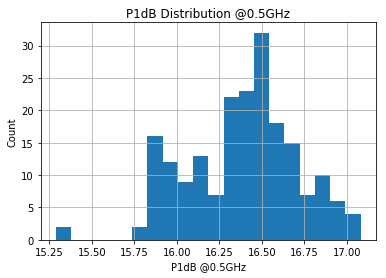

In [115]:
# Plot P1dB distribution at 0.5GHz
compression_level_1dB_500MHz.Pout_comp.hist(bins=20)
plt.title('P1dB Distribution @0.5GHz')
plt.xlabel('P1dB @0.5GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P1dB, Freq=0.5GHz)

In [116]:
compression_level_1dB_500MHz.describe()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
count,198.0,198.0,198.000000,198.000000,198.000000,198.000000
mean,0.5,1.0,0.944040,16.386970,16.438687,65.134843
std,0.0,0.0,0.314287,0.325064,0.090897,1.044362
min,0.5,1.0,-0.220000,15.290000,16.240000,62.016000
25%,0.5,1.0,0.732500,16.160000,16.370000,64.329750
50%,0.5,1.0,1.015000,16.420000,16.430000,65.237000
75%,0.5,1.0,1.130000,16.617500,16.500000,65.848250
max,0.5,1.0,1.760000,17.080000,16.670000,67.889000


# P1dB Distribution (Freq=2GHz)

In [117]:
compression_level_1dB_2GHz = compression_level_1dB.loc[compression_level_1dB['Freq'] == 2].drop(['ID', 'Test', 'Die', 'Vdd'], axis=1)
compression_level_1dB_2GHz.head()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
1,2.0,1,0.11,16.06,16.95,64.855
11,2.0,1,-0.25,15.79,17.04,63.663
21,2.0,1,-0.09,15.89,16.99,64.271
31,2.0,1,0.00,15.99,16.99,64.685
41,2.0,1,-0.16,15.81,16.97,63.773


In [118]:
# Export data to csv
compression_level_1dB_2GHz.to_csv('docs/B18U01_804A_Power_NC_compression_level_1dB_2GHz.csv')

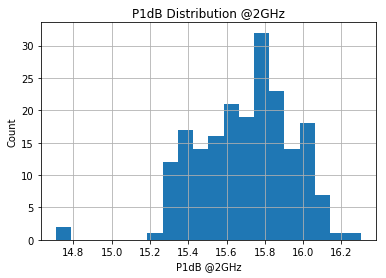

In [119]:
# Plot P1dB distribution at 2GHz
compression_level_1dB_2GHz.Pout_comp.hist(bins=20)
plt.title('P1dB Distribution @2GHz')
plt.xlabel('P1dB @2GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P1dB, Freq=2GHz)

In [120]:
compression_level_1dB_2GHz.describe()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
count,198.0,198.0,198.000000,198.000000,198.000000,198.00000
mean,2.0,1.0,-0.186414,15.695253,16.885404,63.91949
std,0.0,0.0,0.255454,0.249539,0.079501,0.78086
min,2.0,1.0,-1.270000,14.710000,16.660000,61.58200
25%,2.0,1.0,-0.337500,15.512500,16.830000,63.38425
50%,2.0,1.0,-0.145000,15.725000,16.880000,63.96500
75%,2.0,1.0,0.000000,15.870000,16.947500,64.43750
max,2.0,1.0,0.440000,16.300000,17.070000,66.03100


# P1dB Distribution (Freq=6GHz)

In [121]:
compression_level_1dB_6GHz = compression_level_1dB.loc[compression_level_1dB['Freq'] == 6].drop(['ID', 'Test', 'Die', 'Vdd'], axis=1)
compression_level_1dB_6GHz.head()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
2,6.0,1,0.10,15.79,16.69,64.274
12,6.0,1,-0.18,15.57,16.75,63.153
22,6.0,1,-0.07,15.66,16.73,63.745
32,6.0,1,-0.12,15.60,16.72,63.931
42,6.0,1,-0.06,15.68,16.75,63.356


In [122]:
# Export data to csv
compression_level_1dB_6GHz.to_csv('docs/B18U01_804A_Power_NC_compression_level_1dB_6GHz.csv')

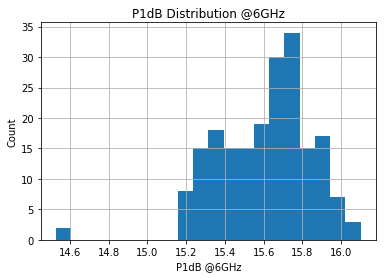

In [123]:
# Plot P1dB distribution at 6GHz
compression_level_1dB_6GHz.Pout_comp.hist(bins=20)
plt.title('P1dB Distribution @6GHz')
plt.xlabel('P1dB @6GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P1dB, Freq=6GHz)

In [124]:
compression_level_1dB_6GHz.describe()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
count,198.0,198.0,198.000000,198.000000,198.000000,198.000000
mean,6.0,1.0,-0.060960,15.607778,16.669040,63.588475
std,0.0,0.0,0.242344,0.242546,0.079775,0.708473
min,6.0,1.0,-1.180000,14.530000,16.380000,61.390000
25%,6.0,1.0,-0.217500,15.440000,16.612500,63.072250
50%,6.0,1.0,-0.005000,15.650000,16.665000,63.644000
75%,6.0,1.0,0.110000,15.780000,16.730000,64.051500
max,6.0,1.0,0.710000,16.100000,16.840000,65.804000


# P1dB Distribution (Freq=8GHz)

In [125]:
compression_level_1dB_8GHz = compression_level_1dB.loc[compression_level_1dB['Freq'] == 8].drop(['ID', 'Test', 'Die', 'Vdd'], axis=1)
compression_level_1dB_8GHz.head()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
3,8.0,1,-0.35,15.67,17.02,62.335
13,8.0,1,-1.08,15.10,17.18,61.188
23,8.0,1,-0.70,15.34,17.04,61.786
33,8.0,1,-0.73,15.33,17.07,62.192
43,8.0,1,-0.75,15.30,17.05,61.328


In [126]:
# Export data to csv
compression_level_1dB_8GHz.to_csv('docs/B18U01_804A_Power_NC_compression_level_1dB_8GHz.csv')

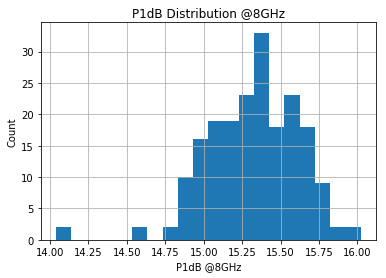

In [127]:
# Plot P1dB distribution at 8GHz
compression_level_1dB_8GHz.Pout_comp.hist(bins=20)
plt.title('P1dB Distribution @8GHz')
plt.xlabel('P1dB @8GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P1dB, Freq=8GHz)

In [128]:
compression_level_1dB_8GHz.describe()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
count,198.0,198.0,198.000000,198.000000,198.000000,198.000000
mean,8.0,1.0,-0.667222,15.320909,16.993788,61.711783
std,0.0,0.0,0.308224,0.298023,0.094010,0.580499
min,8.0,1.0,-2.000000,14.040000,16.690000,60.051000
25%,8.0,1.0,-0.867500,15.112500,16.950000,61.278000
50%,8.0,1.0,-0.620000,15.340000,16.980000,61.745000
75%,8.0,1.0,-0.462500,15.530000,17.050000,62.108000
max,8.0,1.0,0.060000,16.020000,17.200000,63.266000


# P1dB Distribution (Freq=12GHz)

In [129]:
compression_level_1dB_12GHz = compression_level_1dB.loc[compression_level_1dB['Freq'] == 12].drop(['ID', 'Test', 'Die', 'Vdd'], axis=1)
compression_level_1dB_12GHz.head()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
4,12.0,1,-4.62,13.09,18.72,60.268
14,12.0,1,-4.19,13.39,18.59,60.130
24,12.0,1,-4.54,13.05,18.60,60.112
34,12.0,1,-4.62,13.12,18.75,60.482
44,12.0,1,-4.69,13.02,18.71,59.567


In [130]:
# Export data to csv
compression_level_1dB_12GHz.to_csv('docs/B18U01_804A_Power_NC_compression_level_1dB_12GHz.csv')

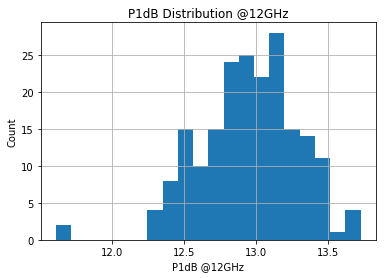

In [131]:
# Plot P1dB distribution at 12GHz
compression_level_1dB_12GHz.Pout_comp.hist(bins=20)
plt.title('P1dB Distribution @12GHz')
plt.xlabel('P1dB @12GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P1dB, Freq=12GHz)

In [132]:
compression_level_1dB_12GHz.describe()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
count,198.0,198.0,198.000000,198.000000,198.000000,198.000000
mean,12.0,1.0,-4.733586,12.955758,18.695404,60.020495
std,0.0,0.0,0.411589,0.344755,0.157910,0.428966
min,12.0,1.0,-6.100000,11.610000,18.050000,59.078000
25%,12.0,1.0,-4.975000,12.760000,18.640000,59.734000
50%,12.0,1.0,-4.720000,12.960000,18.710000,60.020000
75%,12.0,1.0,-4.552500,13.177500,18.770000,60.288750
max,12.0,1.0,-3.320000,13.730000,19.020000,61.358000


# P3dB Distribution (Freq=0.5GHz)

In [133]:
compression_level_3dB_500MHz = compression_level_3dB.loc[compression_level_3dB['Freq'] == 0.5].drop(['ID', 'Test', 'Die', 'Vdd'], axis=1)
compression_level_3dB_500MHz.head()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
5,0.5,3,5.16,18.71,16.55,70.883
15,0.5,3,4.77,18.42,16.65,68.855
25,0.5,3,4.92,18.53,16.60,69.615
35,0.5,3,4.96,18.59,16.63,70.068
45,0.5,3,4.91,18.49,16.58,69.164


In [134]:
# Export data to csv
compression_level_3dB_500MHz.to_csv('docs/B18U01_804A_Power_NC_compression_level_3dB_500MHz.csv')

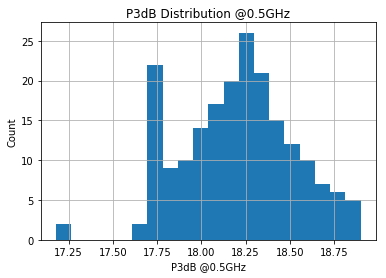

In [135]:
# Plot P1dB distribution at 6GHz
compression_level_3dB_500MHz.Pout_comp.hist(bins=20)
plt.title('P3dB Distribution @0.5GHz')
plt.xlabel('P3dB @0.5GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P3dB, Freq=0.5GHz)

In [136]:
compression_level_3dB_500MHz.describe()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
count,198.0,198.0,198.000000,198.000000,198.000000,198.000000
mean,0.5,3.0,4.761263,18.203990,16.438687,68.790288
std,0.0,0.0,0.308463,0.319539,0.090897,1.679216
min,0.5,3.0,3.680000,17.180000,16.240000,63.522000
25%,0.5,3.0,4.550000,17.970000,16.370000,67.557250
50%,0.5,3.0,4.800000,18.230000,16.430000,69.007500
75%,0.5,3.0,4.930000,18.427500,16.500000,69.852000
max,0.5,3.0,5.580000,18.900000,16.670000,72.617000


# P3dB Distribution (Freq=2GHz)

In [137]:
compression_level_3dB_2GHz = compression_level_3dB.loc[compression_level_3dB['Freq'] == 2].drop(['ID', 'Test', 'Die', 'Vdd'], axis=1)
compression_level_3dB_2GHz.head()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
6,2.0,3,3.90,17.86,16.95,70.517
16,2.0,3,3.49,17.54,17.04,68.544
26,2.0,3,3.65,17.65,16.99,69.455
36,2.0,3,3.68,17.68,16.99,69.716
46,2.0,3,3.60,17.58,16.97,68.987


In [138]:
# Export data to csv
compression_level_3dB_2GHz.to_csv('docs/B18U01_804A_Power_NC_compression_level_3dB_2GHz.csv')

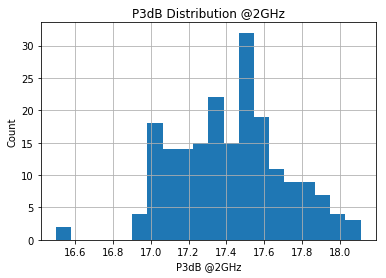

In [139]:
# Plot P1dB distribution at 2GHz
compression_level_3dB_2GHz.Pout_comp.hist(bins=20)
plt.title('P3dB Distribution @2GHz')
plt.xlabel('P3dB @2GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P3dB, Freq=2GHz)

In [140]:
compression_level_3dB_2GHz.describe()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
count,198.0,198.0,198.000000,198.000000,198.000000,198.000000
mean,2.0,3.0,3.533535,17.423485,16.885404,68.482773
std,0.0,0.0,0.289194,0.284515,0.079501,1.558927
min,2.0,3.0,2.540000,16.500000,16.660000,63.801000
25%,2.0,3.0,3.330000,17.220000,16.830000,67.309000
50%,2.0,3.0,3.570000,17.450000,16.880000,68.594500
75%,2.0,3.0,3.710000,17.580000,16.947500,69.448250
max,2.0,3.0,4.310000,18.110000,17.070000,72.171000


# P3dB Distribution (Freq=6GHz)

In [141]:
compression_level_3dB_6GHz = compression_level_3dB.loc[compression_level_3dB['Freq'] == 6].drop(['ID', 'Test', 'Die', 'Vdd'], axis=1)
compression_level_3dB_6GHz.head()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
7,6.0,3,4.02,17.71,16.69,69.217
17,6.0,3,3.72,17.48,16.75,67.571
27,6.0,3,3.97,17.70,16.73,68.685
37,6.0,3,3.85,17.58,16.72,68.645
47,6.0,3,3.82,17.57,16.75,68.205


In [142]:
# Export data to csv
compression_level_3dB_6GHz.to_csv('docs/B18U01_804A_Power_NC_compression_level_3dB_6GHz.csv')

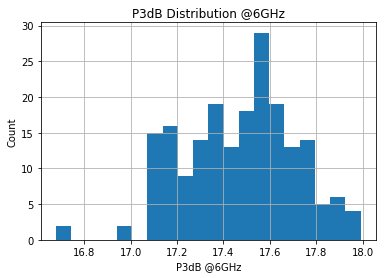

In [143]:
# Plot P1dB distribution at 6GHz
compression_level_3dB_6GHz.Pout_comp.hist(bins=20)
plt.title('P3dB Distribution @6GHz')
plt.xlabel('P3dB @6GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P3dB, Freq=6GHz)

In [144]:
compression_level_3dB_6GHz.describe()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
count,198.0,198.0,198.000000,198.000000,198.000000,198.000000
mean,6.0,3.0,3.795657,17.469192,16.669040,67.747985
std,0.0,0.0,0.243707,0.240018,0.079775,1.187995
min,6.0,3.0,2.970000,16.680000,16.380000,64.084000
25%,6.0,3.0,3.615000,17.290000,16.612500,66.841750
50%,6.0,3.0,3.835000,17.490000,16.665000,67.885500
75%,6.0,3.0,3.957500,17.637500,16.730000,68.548750
max,6.0,3.0,4.490000,17.990000,16.840000,70.564000


# P3dB Distribution (Freq=8GHz)

In [145]:
compression_level_3dB_8GHz = compression_level_3dB.loc[compression_level_3dB['Freq'] == 8].drop(['ID', 'Test', 'Die', 'Vdd'], axis=1)
compression_level_3dB_8GHz.head()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
8,8.0,3,3.80,17.82,17.02,65.642
18,8.0,3,3.21,17.40,17.18,63.935
28,8.0,3,3.47,17.52,17.04,64.799
38,8.0,3,3.57,17.65,17.07,65.293
48,8.0,3,3.47,17.52,17.05,64.497


In [146]:
# Export data to csv
compression_level_3dB_8GHz.to_csv('docs/B18U01_804A_Power_NC_compression_level_3dB_8GHz.csv')

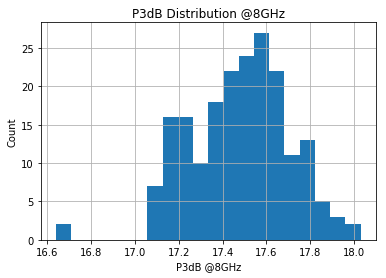

In [147]:
# Plot P1dB distribution at 8GHz
compression_level_3dB_8GHz.Pout_comp.hist(bins=20)
plt.title('P3dB Distribution @8GHz')
plt.xlabel('P3dB @8GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P3dB, Freq=8GHz)

In [148]:
compression_level_3dB_8GHz.describe()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
count,198.0,198.0,198.000000,198.000000,198.000000,198.000000
mean,8.0,3.0,3.483687,17.482374,16.993788,64.283030
std,0.0,0.0,0.246301,0.230673,0.094010,0.962568
min,8.0,3.0,2.560000,16.640000,16.690000,61.184000
25%,8.0,3.0,3.300000,17.320000,16.950000,63.626750
50%,8.0,3.0,3.520000,17.520000,16.980000,64.376000
75%,8.0,3.0,3.620000,17.640000,17.050000,64.925250
max,8.0,3.0,4.140000,18.030000,17.200000,66.522000


# P3dB Distribution (Freq=12GHz)

In [149]:
compression_level_3dB_12GHz = compression_level_3dB.loc[compression_level_3dB['Freq'] == 12].drop(['ID', 'Test', 'Die', 'Vdd'], axis=1)
compression_level_3dB_12GHz.head()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
9,12.0,3,0.06,15.78,18.72,62.861
19,12.0,3,0.37,15.96,18.59,63.196
29,12.0,3,0.24,15.84,18.60,62.452
39,12.0,3,-0.12,15.62,18.75,62.600
49,12.0,3,-0.17,15.54,18.71,61.687


In [150]:
# Export data to csv
compression_level_3dB_12GHz.to_csv('docs/B18U01_804A_Power_NC_compression_level_3dB_12GHz.csv')

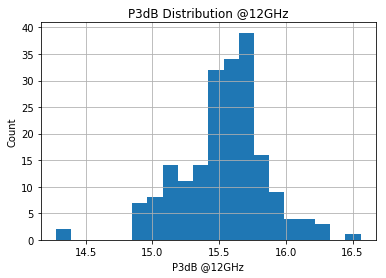

In [151]:
# Plot P1dB distribution at 12GHz
compression_level_3dB_12GHz.Pout_comp.hist(bins=20)
plt.title('P3dB Distribution @12GHz')
plt.xlabel('P3dB @12GHz')
plt.ylabel('Count')
plt.show()

# Key Statistics (P3dB, Freq=12GHz)

In [152]:
compression_level_3dB_12GHz.describe()

,Freq,Compression Level,Pin_comp,Pout_comp,Linear Gain,Id
count,198.0,198.0,198.000000,198.000000,198.000000,198.000000
mean,12.0,3.0,-0.152525,15.539747,18.695404,61.859636
std,0.0,0.0,0.404779,0.321218,0.157910,0.834855
min,12.0,3.0,-1.430000,14.280000,18.050000,59.739000
25%,12.0,3.0,-0.360000,15.372500,18.640000,61.253250
50%,12.0,3.0,-0.160000,15.560000,18.710000,61.821000
75%,12.0,3.0,0.007500,15.737500,18.770000,62.315500
max,12.0,3.0,1.080000,16.560000,19.020000,64.768000
